In [62]:
from itertools import product, combinations, permutations
import random
import math

from sklearn import datasets
import numpy as np
import pandas as pd
from scipy import stats

from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [8]:
def random_predictors(n_predictors, n_predictions):
    predictions = []
    for n in range(n_predictors):
        p = random.uniform(0.6, 0.8)
        pred = [np.random.choice([0, 1], p=[1-p,p]) for i in range(n_predictions)]
        predictions.append((p, pred))
    return predictions

In [25]:
Y = np.ones(100) 
print(Y)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [26]:
preds = random_predictors(10, 100)
print(preds)

[(0.727514140795773, [1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]), (0.7839079105577699, [0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]), (0.6721037275826317, [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0]), (0.7608984865710253, [0, 1, 

In [16]:
def accuracy(X, y):
    return np.dot(X, y) / y.shape[0]

In [27]:
X_pred  = np.vstack([t[1] for t in preds])

In [28]:
print(X_pred)

[[1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1
  1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1
  1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1]
 [0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1
  1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
  1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0
  0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1
  0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0]
 [0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1
  1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1
  0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1
  0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1
  0 1 1 1 0 1 1 1 1 

In [29]:
accuracy(X_pred, Y)

array([ 0.7 ,  0.81,  0.68,  0.73,  0.69,  0.72,  0.69,  0.67,  0.82,  0.72])

In [30]:
def vote_ensemble(X):
    return stats.mode(X)[0]

In [31]:
en_pred = vote_ensemble(X_pred)
print(en_pred)

[[1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1
  0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0]]


In [32]:
accuracy(en_pred, Y)

array([ 0.86])

In [35]:
iris = datasets.load_iris()

In [36]:
type(iris)

sklearn.utils.Bunch

In [37]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris.target_names[iris.target]], 
                       columns= iris['feature_names'] + ['class'])

In [38]:
iris_df.dtypes

sepal length (cm)    object
sepal width (cm)     object
petal length (cm)    object
petal width (cm)     object
class                object
dtype: object

In [39]:
for col in iris['feature_names']:
    iris_df[col] = pd.to_numeric(iris_df[col])

In [40]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                 object
dtype: object

In [42]:
iris_df.shape

(150, 5)

In [43]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
iris_df.groupby('class').size()

class
setosa        50
versicolor    50
virginica     50
dtype: int64

In [46]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
sns.set(style="ticks")

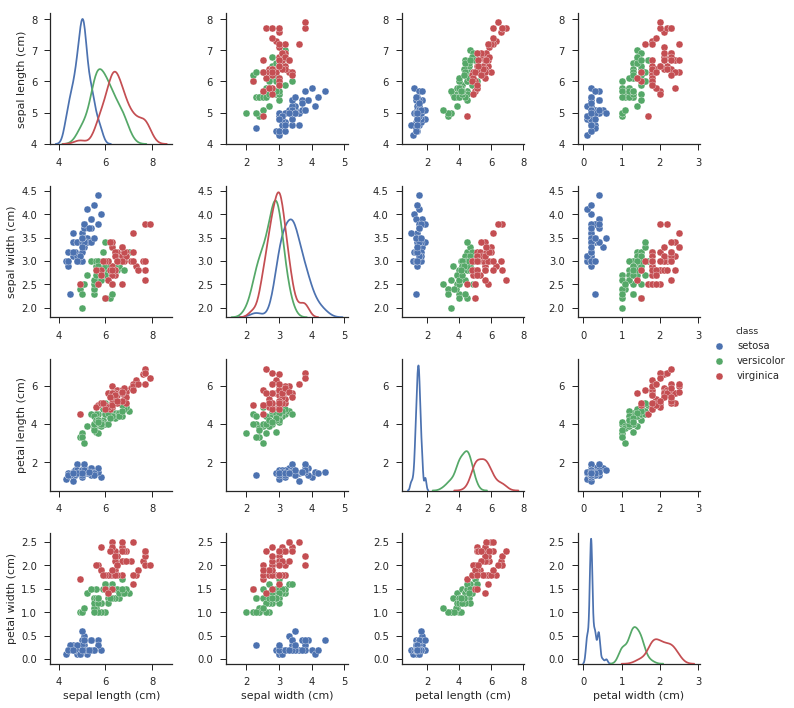

In [47]:
sns.pairplot(iris_df, hue="class", diag_kind="kde")
plt.show()

In [49]:
X, y  = iris.data, iris.target
validation_size = 0.20
seed = 13
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [50]:
def evaluate_classifiers(models, X_train, y_train, X_validation, y_validation):
    results = []
    for name in models.keys():
        model = models[name]
        model.fit(X_train, y_train)
        predictions = model.predict(X_validation)
        acc = accuracy_score(y_validation, predictions)
        cm = confusion_matrix(y_validation, predictions)
        report = classification_report(y_validation, predictions)
        results.append((name, acc, cm, report))
    return results

In [51]:
def report_classifiers_results(model_results):
    for result in model_results:
        name, acc, cm, report = result
        print("Model: %s" % name)
        print("Accuracy: %f" % acc)
        print("Confusion Matrix: \n %s" % cm)
        print(report)
        print()

In [57]:
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier(random_state=13)
models['NB'] = GaussianNB()
models['SVC'] = SVC()

In [58]:
res = evaluate_classifiers(models, X_train, y_train, X_validation, y_validation)

In [59]:
report_classifiers_results(res)

Model: LR
Accuracy: 0.966667
Confusion Matrix: 
 [[ 9  0  0]
 [ 0  7  1]
 [ 0  0 13]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      0.88      0.93         8
          2       0.93      1.00      0.96        13

avg / total       0.97      0.97      0.97        30


Model: LDA
Accuracy: 0.966667
Confusion Matrix: 
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.89      1.00      0.94         8
          2       1.00      0.92      0.96        13

avg / total       0.97      0.97      0.97        30


Model: KNN
Accuracy: 0.900000
Confusion Matrix: 
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  3 10]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.73      1.00      0.84         8
          2       1.00      0.77      0.87

In [60]:
def plot_decision_boundaries(models, X, y, cols=3):
    
    fig = plt.figure(figsize=(15, 10))
    rows = math.ceil(len(models) / (cols * 1.0))
    gs = gridspec.GridSpec(rows, cols)
    grid = []
    for r in range(rows):
        for c in range(cols):
            grid.append((r,c))

    clf_list = models.values()
    labels = models.keys()
    
    for clf, label, grd in zip(clf_list, labels, grid):
        scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
        print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        clf.fit(X, y)
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
        plt.title(label)

    plt.show()

Accuracy: 0.74 (+/- 0.10) [LR]
Accuracy: 0.79 (+/- 0.07) [LDA]
Accuracy: 0.79 (+/- 0.01) [KNN]
Accuracy: 0.67 (+/- 0.02) [CART]
Accuracy: 0.78 (+/- 0.05) [NB]
Accuracy: 0.81 (+/- 0.05) [SVC]


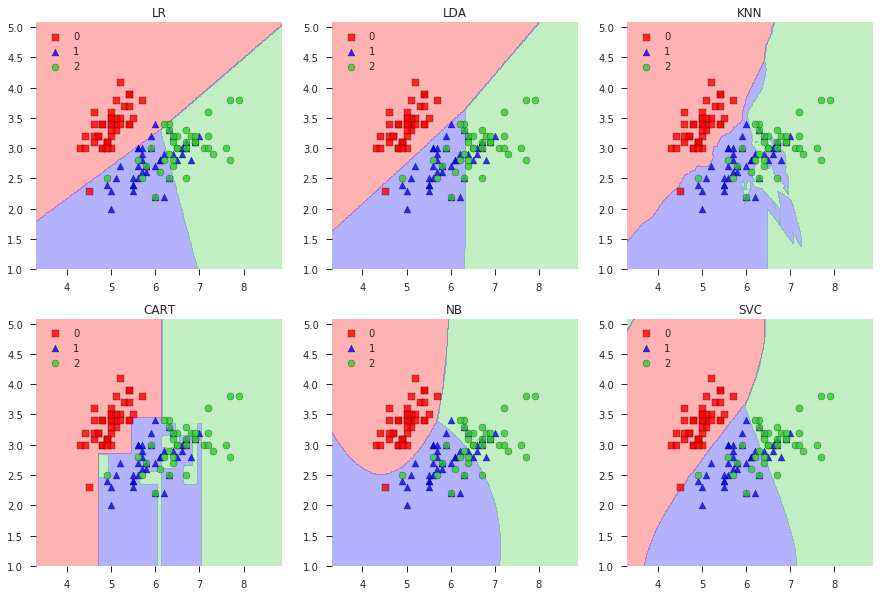

In [63]:
plot_decision_boundaries(models, X_train[:, [0,1]], y_train)

In [64]:
bag_models = {name: models[name] for name in ['KNN', 'CART']}
bag_models['KNN_BAG'] = BaggingClassifier(base_estimator=models['KNN'], n_estimators=10)
bag_models['CART_BAG'] = BaggingClassifier(base_estimator=models['CART'], n_estimators=10)

Accuracy: 0.79 (+/- 0.01) [KNN]
Accuracy: 0.67 (+/- 0.02) [CART]
Accuracy: 0.78 (+/- 0.02) [KNN_BAG]
Accuracy: 0.72 (+/- 0.03) [CART_BAG]


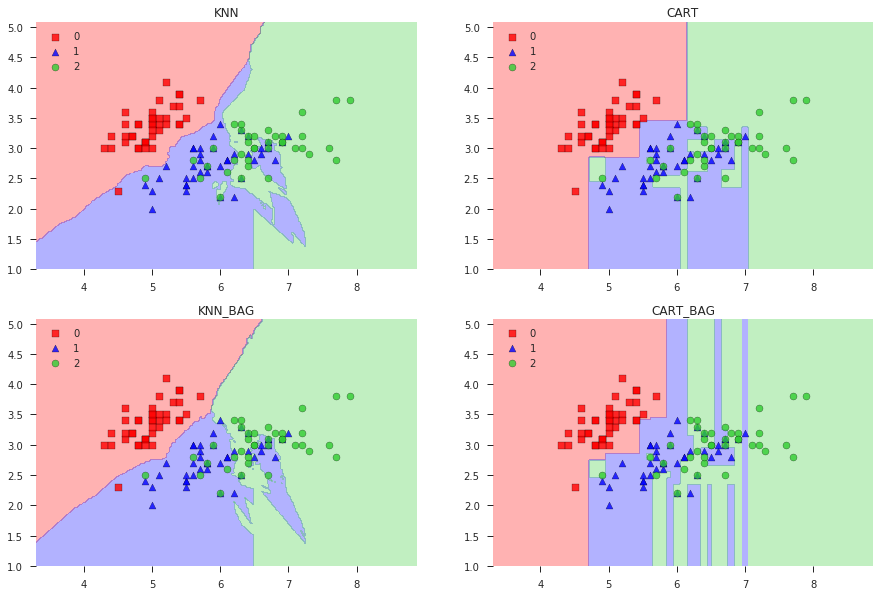

In [68]:
plot_decision_boundaries(bag_models, X_train[:, [0,1]], y_train, cols=2)

In [69]:
bag_models['RF'] = RandomForestClassifier(random_state=0)

Accuracy: 0.79 (+/- 0.01) [KNN]
Accuracy: 0.67 (+/- 0.02) [CART]
Accuracy: 0.82 (+/- 0.06) [KNN_BAG]
Accuracy: 0.72 (+/- 0.05) [CART_BAG]
Accuracy: 0.71 (+/- 0.06) [RF]


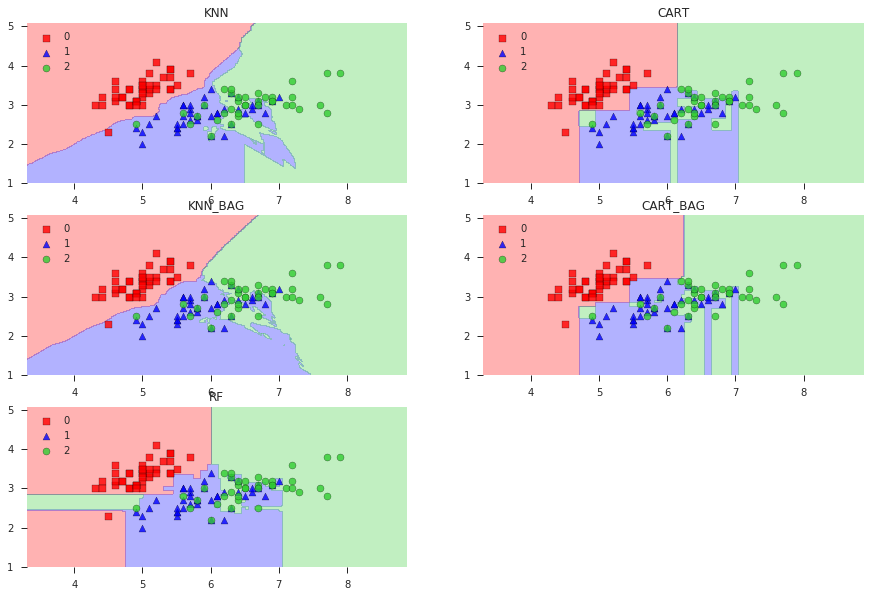

In [70]:
plot_decision_boundaries(bag_models, X_train[:, [0,1]], y_train, cols=2)

In [72]:
report_classifiers_results(evaluate_classifiers(bag_models, X_train, y_train, X_validation, y_validation))

Model: KNN
Accuracy: 0.900000
Confusion Matrix: 
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  3 10]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.73      1.00      0.84         8
          2       1.00      0.77      0.87        13

avg / total       0.93      0.90      0.90        30


Model: CART
Accuracy: 0.933333
Confusion Matrix: 
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  2 11]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.80      1.00      0.89         8
          2       1.00      0.85      0.92        13

avg / total       0.95      0.93      0.93        30


Model: KNN_BAG
Accuracy: 0.900000
Confusion Matrix: 
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  3 10]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.73      1.00      0.84         8
          2       1.00      0.77    

In [75]:
boosting_models = {}
boosting_models['CART'] = models['CART']
boosting_models['ADABOOST_1'] = AdaBoostClassifier(base_estimator=models['CART'], n_estimators=1)
boosting_models['ADABOOST_2'] = AdaBoostClassifier(base_estimator=models['CART'], n_estimators=2)
boosting_models['ADABOOST_3'] = AdaBoostClassifier(base_estimator=models['CART'], n_estimators=3)
boosting_models['ADABOOST_10'] = AdaBoostClassifier(base_estimator=models['CART'], n_estimators=10)
boosting_models['ADABOOST_50'] = AdaBoostClassifier(base_estimator=models['CART'], n_estimators=50)
boosting_models['ADABOOST_100'] = AdaBoostClassifier(base_estimator=models['CART'], n_estimators=100)

Accuracy: 0.67 (+/- 0.02) [CART]
Accuracy: 0.66 (+/- 0.01) [ADABOOST_1]
Accuracy: 0.67 (+/- 0.02) [ADABOOST_2]
Accuracy: 0.72 (+/- 0.04) [ADABOOST_3]
Accuracy: 0.72 (+/- 0.02) [ADABOOST_10]
Accuracy: 0.72 (+/- 0.08) [ADABOOST_50]
Accuracy: 0.74 (+/- 0.06) [ADABOOST_100]


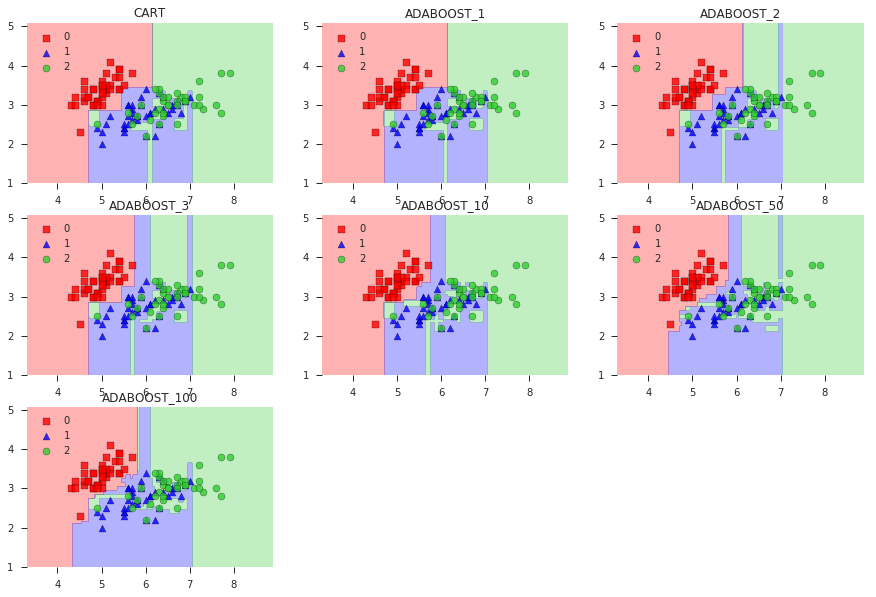

In [76]:
plot_decision_boundaries(boosting_models, X_train[:,[0,1]], y_train, cols=3)

In [77]:
report_classifiers_results(evaluate_classifiers(boosting_models, X_train, y_train, X_validation, y_validation))

Model: CART
Accuracy: 0.933333
Confusion Matrix: 
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  2 11]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.80      1.00      0.89         8
          2       1.00      0.85      0.92        13

avg / total       0.95      0.93      0.93        30


Model: ADABOOST_1
Accuracy: 0.933333
Confusion Matrix: 
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  2 11]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.80      1.00      0.89         8
          2       1.00      0.85      0.92        13

avg / total       0.95      0.93      0.93        30


Model: ADABOOST_2
Accuracy: 0.933333
Confusion Matrix: 
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  2 11]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.80      1.00      0.89         8
          2       1.00    